In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Load Data

In [2]:
# Data files
train_dir = '../../data/external/fer2013/train'
test_dir = '../../data/external/fer2013/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

In [3]:
train_files = []
train_labels = []
train_images = []
for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
            file = os.path.join(dirname, filename)
            image = mpimg.imread(file).flatten()
            train_files.append(file)
            train_images.append(image)
            train_labels.append(emotions[cat])

In [14]:
test_files = []
test_labels = []
test_images = []
for dirname, dirs, filenames in os.walk(test_dir, topdown=True):
    cat = dirname.replace(test_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
            file = os.path.join(dirname, filename)
            image = mpimg.imread(file).flatten()
            test_files.append(file)
            test_images.append(image)
            test_labels.append(emotions[cat])

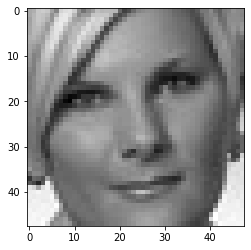

In [5]:
image = mpimg.imread(train_files[1])
imgplot = plt.imshow(image, cmap='gray')
plt.show()

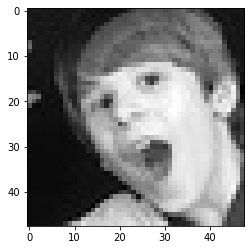

In [6]:
image = mpimg.imread(test_files[1])
imgplot = plt.imshow(image, cmap='gray')
plt.show()

In [5]:
print(len(train_files))
print(len(train_labels))
print(len(train_images))

print(len(test_files))
print(len(test_labels))
print(len(test_images))

28709
28709
28709
7178
7178
7178


# Data Cleaning

In [6]:
# Delete all white or black image
train_images_clean = []
train_labels_clean = []
for row in range(len(train_images)):
    whites = np.sum(train_images[row] == 0)
    blacks =  np.sum(train_images[row] == 255)
    if whites != 2304 and blacks != 2304: 
        train_images_clean.append(train_images[row])
        train_labels_clean.append(train_labels[row])

In [7]:
test_images_clean = []
test_labels_clean = []
for row in range(len(test_images)):
    whites = np.sum(test_images[row] == 0)
    blacks =  np.sum(test_images[row] == 255)
    if whites != 2304 and blacks != 2304: 
        test_images_clean.append(test_images[row])
        test_labels_clean.append(test_labels[row])

In [8]:
print(len(train_images_clean))
print(len(train_labels_clean))
print(len(test_images_clean))
print(len(test_labels_clean))

28698
28698
7177
7177


## Make dataframe

In [9]:
features = []
for x in range(0, train_images[0].shape[0]): 
    features.append('feature '+ str(x))

In [10]:
# Make dataframe 
df_train = pd.DataFrame(data = train_images_clean, 
                  columns = features).astype('uint8')


df_test = pd.DataFrame(data = test_images_clean, 
                  columns = features).astype('uint8')

In [11]:
df = pd.DataFrame(data = train_labels, 
                  columns = ['emotion'])
df_train = df_train.join(df)

df = pd.DataFrame(data = test_labels, 
                  columns = ['emotion'])
df_test= df_test.join(df)

In [12]:
df_train.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
0,108,83,63,65,89,111,121,121,125,111,...,140,131,121,119,115,111,116,122,122,3
1,137,142,159,162,158,134,113,167,174,177,...,76,98,172,196,192,191,191,192,192,3
2,111,148,155,167,181,191,194,193,195,199,...,152,199,190,121,58,59,57,56,60,3
3,151,156,121,100,80,116,151,169,183,185,...,198,196,197,200,203,205,171,33,32,3
4,248,187,149,130,97,140,139,117,197,251,...,72,69,76,98,123,171,195,200,194,3


In [13]:
df_test.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
0,5,4,5,9,10,9,10,12,8,14,...,9,10,8,9,15,19,17,13,11,3
1,19,21,22,18,20,21,16,18,19,18,...,154,167,166,149,70,46,52,57,49,3
2,228,229,230,229,228,227,226,226,226,221,...,22,29,37,34,29,30,38,30,19,3
3,25,33,43,30,46,84,105,118,139,142,...,166,137,111,125,124,128,127,130,136,3
4,33,29,15,15,20,36,40,54,79,98,...,90,80,81,72,49,43,34,75,78,3


In [14]:
df_train.to_csv('train.csv',index=False)

In [15]:
df_test.to_csv('test.csv',index=False)

## Normalization

In [16]:
scaler = MinMaxScaler()
train_images_norm = scaler.fit_transform(train_images_clean)
df_train_scaled = pd.DataFrame(train_images_norm, columns=features)

test_images_norm = scaler.fit_transform(test_images_clean)
df_test_scaled = pd.DataFrame(test_images_norm, columns=features)

In [17]:
df = pd.DataFrame(data = train_labels, 
                  columns = ['emotion'])
df_train_scaled = df_train_scaled.join(df)

df = pd.DataFrame(data = test_labels, 
                  columns = ['emotion'])
df_test_scaled = df_test_scaled.join(df)

In [18]:
df_train_scaled.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
0,0.423529,0.325490,0.247059,0.254902,0.349020,0.435294,0.474510,0.474510,0.490196,0.435294,...,0.549020,0.513725,0.474510,0.466667,0.450980,0.435294,0.454902,0.478431,0.478431,3
1,0.537255,0.556863,0.623529,0.635294,0.619608,0.525490,0.443137,0.654902,0.682353,0.694118,...,0.298039,0.384314,0.674510,0.768627,0.752941,0.749020,0.749020,0.752941,0.752941,3
2,0.435294,0.580392,0.607843,0.654902,0.709804,0.749020,0.760784,0.756863,0.764706,0.780392,...,0.596078,0.780392,0.745098,0.474510,0.227451,0.231373,0.223529,0.219608,0.235294,3
3,0.592157,0.611765,0.474510,0.392157,0.313725,0.454902,0.592157,0.662745,0.717647,0.725490,...,0.776471,0.768627,0.772549,0.784314,0.796078,0.803922,0.670588,0.129412,0.125490,3
4,0.972549,0.733333,0.584314,0.509804,0.380392,0.549020,0.545098,0.458824,0.772549,0.984314,...,0.282353,0.270588,0.298039,0.384314,0.482353,0.670588,0.764706,0.784314,0.760784,3


In [19]:
df_test_scaled.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
0,0.019608,0.015686,0.019608,0.035294,0.039216,0.035294,0.039216,0.047059,0.031373,0.054902,...,0.035294,0.039216,0.031373,0.035294,0.058824,0.074510,0.066667,0.050980,0.043137,3
1,0.074510,0.082353,0.086275,0.070588,0.078431,0.082353,0.062745,0.070588,0.074510,0.070588,...,0.603922,0.654902,0.650980,0.584314,0.274510,0.180392,0.203922,0.223529,0.192157,3
2,0.894118,0.898039,0.901961,0.898039,0.894118,0.890196,0.886275,0.886275,0.886275,0.866667,...,0.086275,0.113725,0.145098,0.133333,0.113725,0.117647,0.149020,0.117647,0.074510,3
3,0.098039,0.129412,0.168627,0.117647,0.180392,0.329412,0.411765,0.462745,0.545098,0.556863,...,0.650980,0.537255,0.435294,0.490196,0.486275,0.501961,0.498039,0.509804,0.533333,3
4,0.129412,0.113725,0.058824,0.058824,0.078431,0.141176,0.156863,0.211765,0.309804,0.384314,...,0.352941,0.313725,0.317647,0.282353,0.192157,0.168627,0.133333,0.294118,0.305882,3


# EDA

In [20]:
df_train.describe()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
count,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,...,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000
mean,120.347934,117.229354,114.216252,111.727472,109.530141,107.853021,106.945258,106.761203,107.459440,109.012057,...,110.167120,109.988640,110.185170,110.708725,110.904175,111.566695,112.714057,113.519932,114.350164,3.318315
std,82.442474,80.980529,79.794651,78.239535,76.503941,74.717286,73.174691,71.567208,70.364435,69.368508,...,71.239727,72.232571,73.370421,74.556286,75.464366,76.353489,77.323799,77.962610,78.569143,1.876443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,44.000000,43.000000,43.000000,43.000000,43.000000,44.000000,45.000000,47.000000,49.000000,...,48.000000,47.000000,46.000000,44.000000,43.250000,43.000000,43.000000,43.000000,43.000000,2.000000
50%,110.000000,105.000000,101.000000,98.000000,95.000000,95.000000,94.000000,96.000000,98.000000,101.000000,...,104.000000,103.000000,102.000000,104.000000,103.000000,103.000000,105.000000,105.000000,106.000000,3.000000
75%,194.000000,187.000000,181.000000,175.000000,171.000000,167.000000,164.000000,162.000000,162.000000,163.000000,...,167.000000,168.000000,170.000000,172.000000,173.000000,175.000000,177.000000,180.000000,181.000000,5.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,6.000000


In [21]:
df_test.describe()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
count,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.00000,7177.000000,7177.000000,7177.000000,7177.000000,...,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000
mean,118.889508,115.903999,113.174307,110.361990,108.418838,107.47499,106.581580,105.994287,106.344573,107.542427,...,110.198412,109.904835,109.919186,110.818587,111.626724,112.451303,113.090706,113.733315,114.959036,3.346942
std,82.394901,80.821269,79.286809,77.836746,76.143689,74.68232,72.786315,71.648104,70.307825,69.234478,...,71.650858,72.776059,73.997698,75.433245,76.097444,77.147551,78.225288,78.703240,79.485758,1.862397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,44.000000,43.000000,42.000000,43.000000,43.00000,44.000000,44.000000,46.000000,47.000000,...,48.000000,46.000000,43.000000,43.000000,42.000000,41.000000,41.000000,41.000000,41.000000,2.000000
50%,108.000000,103.000000,100.000000,97.000000,95.000000,94.00000,95.000000,95.000000,97.000000,101.000000,...,105.000000,103.000000,103.000000,103.000000,105.000000,106.000000,105.000000,106.000000,108.000000,3.000000
75%,192.000000,185.000000,179.000000,174.000000,169.000000,166.00000,162.000000,160.000000,160.000000,161.000000,...,168.000000,168.000000,169.000000,173.000000,176.000000,178.000000,179.000000,181.000000,183.000000,5.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,6.000000


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28698 entries, 0 to 28697
Columns: 2305 entries, feature 0 to emotion
dtypes: int64(1), uint8(2304)
memory usage: 63.3 MB


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7177 entries, 0 to 7176
Columns: 2305 entries, feature 0 to emotion
dtypes: int64(1), uint8(2304)
memory usage: 15.8 MB


In [24]:
df_train_scaled.describe()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
count,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,...,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000,28698.000000
mean,0.471953,0.459723,0.447907,0.438147,0.429530,0.422953,0.419393,0.418671,0.421410,0.427498,...,0.432028,0.431328,0.432099,0.434152,0.434918,0.437516,0.442016,0.445176,0.448432,3.318315
std,0.323304,0.317571,0.312920,0.306822,0.300015,0.293009,0.286960,0.280656,0.275939,0.272033,...,0.279371,0.283265,0.287727,0.292378,0.295939,0.299425,0.303231,0.305736,0.308114,1.876443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180392,0.172549,0.168627,0.168627,0.168627,0.168627,0.172549,0.176471,0.184314,0.192157,...,0.188235,0.184314,0.180392,0.172549,0.169608,0.168627,0.168627,0.168627,0.168627,2.000000
50%,0.431373,0.411765,0.396078,0.384314,0.372549,0.372549,0.368627,0.376471,0.384314,0.396078,...,0.407843,0.403922,0.400000,0.407843,0.403922,0.403922,0.411765,0.411765,0.415686,3.000000
75%,0.760784,0.733333,0.709804,0.686275,0.670588,0.654902,0.643137,0.635294,0.635294,0.639216,...,0.654902,0.658824,0.666667,0.674510,0.678431,0.686275,0.694118,0.705882,0.709804,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [25]:
df_test_scaled.describe()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
count,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,...,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000
mean,0.466233,0.454525,0.443821,0.432792,0.425172,0.421471,0.417967,0.415664,0.417038,0.421735,...,0.432151,0.430999,0.431056,0.434583,0.437752,0.440986,0.443493,0.446013,0.450820,3.346942
std,0.323117,0.316946,0.310929,0.305242,0.298603,0.292872,0.285437,0.280973,0.275717,0.271508,...,0.280984,0.285396,0.290187,0.295817,0.298421,0.302539,0.306766,0.308640,0.311709,1.862397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.176471,0.172549,0.168627,0.164706,0.168627,0.168627,0.172549,0.172549,0.180392,0.184314,...,0.188235,0.180392,0.168627,0.168627,0.164706,0.160784,0.160784,0.160784,0.160784,2.000000
50%,0.423529,0.403922,0.392157,0.380392,0.372549,0.368627,0.372549,0.372549,0.380392,0.396078,...,0.411765,0.403922,0.403922,0.403922,0.411765,0.415686,0.411765,0.415686,0.423529,3.000000
75%,0.752941,0.725490,0.701961,0.682353,0.662745,0.650980,0.635294,0.627451,0.627451,0.631373,...,0.658824,0.658824,0.662745,0.678431,0.690196,0.698039,0.701961,0.709804,0.717647,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
